# Analisando dados do Stack Overflow Annual Developer Survey 2020. 

**Este notebook foi criado exclusivamente para aprendizado e está sendo atualizado. Algumas questões respondidas aqui fazem parte do desafio do bootcamp em ciência de dados do IGTI. Qualquer erro ou sugestão é só mandar um alô :)**

O dataset pode ser baixado em https://insights.stackoverflow.com/survey


Inicialmente, vamos tentar responder as seguintes questões:

1. Considerando o nível de formação, qual a média salarial de desenvolvedores na França?
2. Considerando a satistifação, qual a média salarial dos desenvolvedore no Chile?
3. Qual o sistema operacional mais utilizado na França?
4. Considerando os desenvolvedores da Albânia, pode-se afirmar que o salário anual aumenta de acordo com a idade?
5. Qual a média e a mediana de salários no Brasil?
6. Com exceção dos Estados Unidos, qual é o país com maior número de desenvolvedores que nunca tiveram educação formal?
7. Com que idade a maioria dos desenvolvedores brasileiro começa a programar?


## Setup: Importando as bibliotecas necessárias

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
from sklearn.linear_model import LinearRegression

In [11]:
sns.set() # Estilo ggplot

In [12]:
df = pd.read_csv("data/survey_results_public.csv") # Lendo os resultados
df.head() # Dando uma olhada no daaset inteiro

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [13]:
print("Shape: ", df.shape) # vamos ver o shape
df.columns # A lista de todas as colunas do dataset

Shape:  (64461, 61)


Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

## Setup: Filtrando apenas algumas colunas
Para facilitar o entendimento e manipulação do dataset, vamos usar apenas algumas colunas por enquanto.

* Age: Idade do desenvolvedor
* Age1stCode: Idade que começou a programar
* ConvertedComp: Salário anual em dólares
* Country: País
* EdLevel: Nível de formação
* JobSat: Satisfação com emprego
* OpSys: Qual o sistema peracional usa
* YearsCode: Há quantos anos programa

In [14]:
selected_columns = ['Age', 'Age1stCode', 'ConvertedComp', 'Country', 'EdLevel', 'JobSat', 'OpSys', 'YearsCode']
df = df[selected_columns]
df.head()

,Age,Age1stCode,ConvertedComp,Country,EdLevel,JobSat,OpSys,YearsCode
0,NaN,13,NaN,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Slightly satisfied,Windows,36
1,NaN,19,NaN,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Very dissatisfied,MacOS,7
2,NaN,15,NaN,Russian Federation,NaN,NaN,Linux-based,4
3,25.0,18,NaN,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Slightly dissatisfied,Linux-based,7
4,31.0,16,NaN,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Windows,15


## 1. Considerando o nível de formação, qual a média salarial de desenvolvedores na França?

Obs: Por padrão, o pandas não vai levar em consideração os valores NaN para o cálculo da média.

Referência: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html

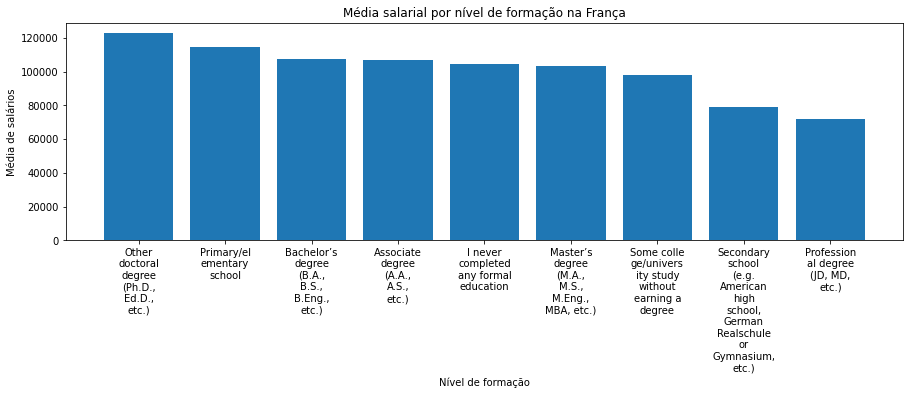

In [5]:
# Filtrando apenas os desenvolvedores da França 
# df[df["Country"] == "France"] também pode ser usado
df_france = df.query("Country.str.contains('France', na=False)", engine="python") 

# Agrupando por EdLevel e fazendo a média
grouped = df.groupby("EdLevel").mean().sort_values("ConvertedComp", ascending=False) #

# coloca um \n no mome para ficar melhor de visualizar
xlabels = ['\n'.join(wrap(label, 10)) for label in grouped.index] 


""" 
    Este trecho de código a seguir vai se repetir bastante... 
    Poderíamos criar um função especificamente para isso.... 
    Por enquanto vamos deixar assim
"""

_ = plt.figure(figsize=(15,4))
_ = plt.bar(xlabels, grouped["ConvertedComp"].values)
_ = plt.xlabel("Nível de formação")
_ = plt.ylabel("Média de salários")
_ = plt.title("Média salarial por nível de formação na França")

plt.show()

## 2. Considerando a satistifação, qual a média salarial dos desenvolvedore no Chile?

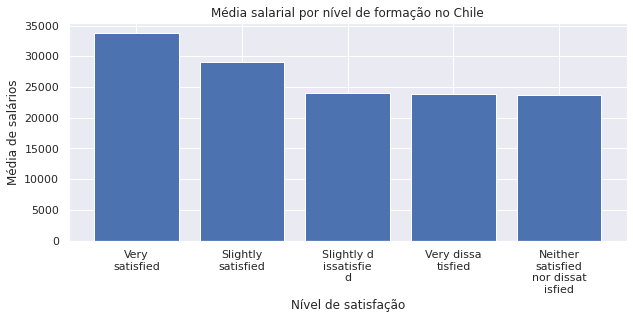

In [37]:
df_chile = df.query("Country.str.contains('Chile', na=False)", engine="python") 
grouped = df_chile.groupby("JobSat").mean().sort_values("ConvertedComp", ascending=False)

# coloca um \n no mome para ficar melhor de visualizar
xlabels = ['\n'.join(wrap(label, 10)) for label in grouped.index] 

_ = plt.figure(figsize=(10, 4))
_ = plt.bar(xlabels, grouped["ConvertedComp"].values)
_ = plt.xlabel("Nível de satisfação")
_ = plt.ylabel("Média de salários")
_ = plt.title("Média salarial por nível de formação no Chile")

plt.show()

## 3. Qual o sistema operacional mais utilizado na França?

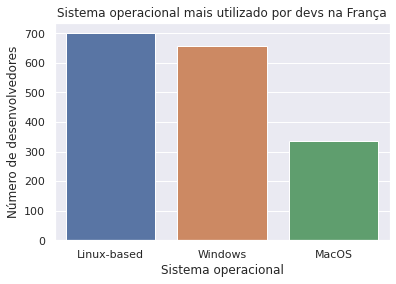

In [17]:
df_france = df.query("Country.str.contains('France', na=False)", engine="python") 

# Valores únicos
count = df_france["OpSys"].value_counts()

_ = sns.barplot(count.index, count.values)
_ = plt.xlabel("Sistema operacional")
_ = plt.ylabel("Número de desenvolvedores")
_ = plt.title("Sistema operacional mais utilizado por devs na França")
plt.show()


## 4. Considerando os desenvolvedores da Albânia,  pode-se afirmar que o salário anual aumenta de acordo com a idade?

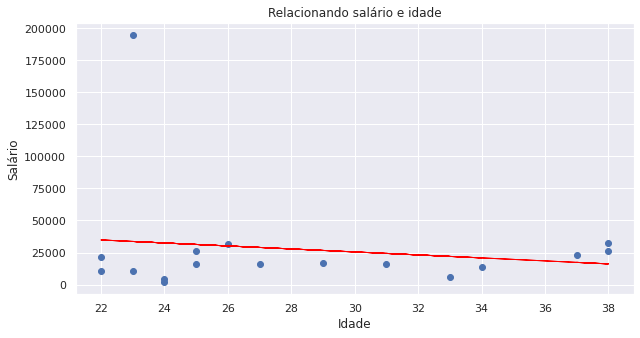

In [18]:
df_albania = df[df["Country"] == 'Albania']

# remove todos os NaN
droped = df_albania[["Age", "ConvertedComp"]].dropna()
X, y = droped.Age.values.reshape(-1, 1), droped.ConvertedComp.values

clf = LinearRegression()
clf.fit(X, y)
predicted = clf.predict(X)
_ = plt.figure(figsize=(10,5))
_ = plt.scatter(df_albania.Age.values, df_albania.ConvertedComp.values)
_ = plt.plot(X, predicted, color='red', linewidth=1)
_ = plt.xlabel("Idade")
_ = plt.ylabel("Salário")
_ = plt.title("Relacionando salário e idade")
plt.show()

## 5. Qual a média e a mediana de salários no Brasil?

* Vamos ver o resumo dos salários
* Ver o formato da distribuição para termos uma noção como esses salários estão
* **Perceba que a média e a mediana bem são diferentes.. Provavelmente existem valores discrepantes que estão influenciando a média** 

count       1157.000000
mean       24941.354365
std        44729.279999
min            0.000000
25%         9900.000000
50%        17184.000000
75%        27492.000000
max      1000000.000000
Name: ConvertedComp, dtype: float64


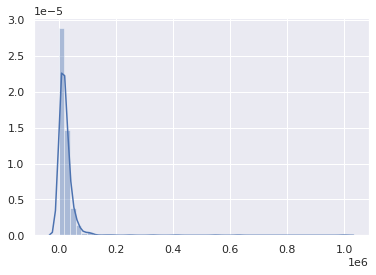

In [108]:
df_brasil = df[df["Country"] == 'Brazil' ]
print(df_brasil.ConvertedComp.describe())
_ = sns.distplot(df_brasil.ConvertedComp.values)

## 6. Com exceção  dos Estados Unidos, qual é o país com maior número de desenvolvedores que nunca tiveram educação formal?

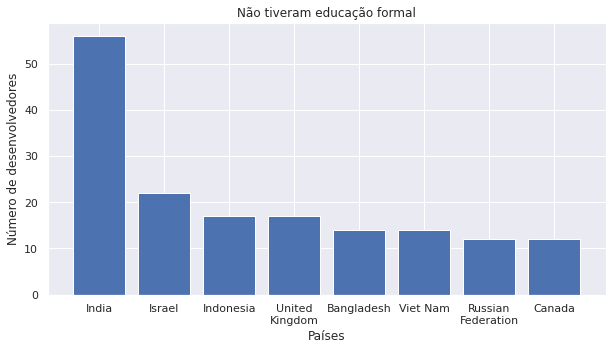

In [19]:
# Já podemos fazer esse filtro de uma vez. Não USA e EdLevel igual a "I never completed any formal education"
df_mundial = df[(df["Country"] != 'United States') & (df["EdLevel"] == "I never completed any formal education")]
grouped = df_mundial["Country"].value_counts()

xlabels = ['\n'.join(wrap(label, 10)) for label in grouped.index[:8]] 

_ = plt.figure(figsize=(10,5))
_ = plt.bar(xlabels, grouped.values[:8])
_ = plt.xlabel("Países")
_ = plt.ylabel("Número de desenvolvedores")
_ = plt.title("Não tiveram educação formal")
plt.show()

## 7. Com que idade a maioria dos desenvolvedores brasileiro começa a programar?


#### Observações: 
* Como pode ser notado no gráfico a seguir, em geral, os programadores brasileiros tiveram seu primeiro contato com programação entre 16 e 18 anos, sendo que a idade mais frequente é 17. 
* Um dos motivos pode ser que, em geral, 17 anos é a idade que os desenolvedores ingressam na faculdade e têm seu primeiro contato com essa área. 


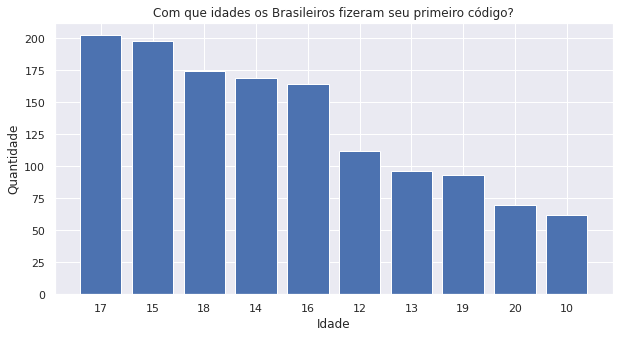

In [20]:
df_brazil = df[df['Country'] == "Brazil"]
count = df_brazil.Age1stCode.value_counts()

_ = plt.figure(figsize=(10,5))
_ = plt.xlabel("Idade")
_ = plt.ylabel("Quantidade")
_ = plt.title("Com que idades os Brasileiros fizeram seu primeiro código?")
_ = plt.bar(count.index[: 10], count.values[:10])
plt.show()

## 10. Qual a linguagem mais utilizada mundialmente? E no Brasil?
TODO

## 11. O quanto a idade influencia no salário?
TODO

## 12. Qual a variação de salário nos ultimos 5 anos no mundo? E no Brasil?
TODO

## 13. É possível prever o salário de um dev no Brasil com base em outros atributos? Quais atributos mais relevantes?
TODO

# To be continued 